In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('vgchartz-2024.csv')

In [9]:
df.head

<bound method NDFrame.head of                                                  img  \
0      /games/boxart/full_6510540AmericaFrontccc.jpg   
1      /games/boxart/full_5563178AmericaFrontccc.jpg   
2                        /games/boxart/827563ccc.jpg   
3      /games/boxart/full_9218923AmericaFrontccc.jpg   
4      /games/boxart/full_4990510AmericaFrontccc.jpg   
...                                              ...   
64011  /games/boxart/full_2779838AmericaFrontccc.jpg   
64012  /games/boxart/full_8031506AmericaFrontccc.jpg   
64013  /games/boxart/full_6553045AmericaFrontccc.jpg   
64014    /games/boxart/full_6012940JapanFrontccc.png   
64015                      /games/boxart/default.jpg   

                                  title console         genre  \
0                    Grand Theft Auto V     PS3        Action   
1                    Grand Theft Auto V     PS4        Action   
2           Grand Theft Auto: Vice City     PS2        Action   
3                    Grand Theft Auto

In [11]:
df.shape

(64016, 14)

## Data cleaning

### Deleting unwanted column

In [15]:
df.drop(columns = ['img'], inplace = True)

In [19]:
df.columns

Index(['title', 'console', 'genre', 'publisher', 'developer', 'critic_score',
       'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales',
       'release_date', 'last_update'],
      dtype='object')

### Checking for Null value

In [23]:
df.isna().sum

<bound method DataFrame.sum of        title  console  genre  publisher  developer  critic_score  total_sales  \
0      False    False  False      False      False         False        False   
1      False    False  False      False      False         False        False   
2      False    False  False      False      False         False        False   
3      False    False  False      False      False          True        False   
4      False    False  False      False      False         False        False   
...      ...      ...    ...        ...        ...           ...          ...   
64011  False    False  False      False      False          True         True   
64012  False    False  False      False      False          True         True   
64013  False    False  False      False      False          True         True   
64014  False    False  False      False      False          True         True   
64015  False    False  False      False      False          True         True 

In [25]:
df.info

<bound method DataFrame.info of                                   title console         genre  \
0                    Grand Theft Auto V     PS3        Action   
1                    Grand Theft Auto V     PS4        Action   
2           Grand Theft Auto: Vice City     PS2        Action   
3                    Grand Theft Auto V    X360        Action   
4             Call of Duty: Black Ops 3     PS4       Shooter   
...                                 ...     ...           ...   
64011             XBlaze Lost: Memories      PC  Visual Novel   
64012                      Yoru, Tomosu     PS4  Visual Novel   
64013                      Yoru, Tomosu      NS  Visual Novel   
64014   Yunohana SpRING! ~Mellow Times~      NS  Visual Novel   
64015  Yurukill: The Calumniation Games     PS4  Visual Novel   

                  publisher             developer  critic_score  total_sales  \
0            Rockstar Games        Rockstar North           9.4        20.32   
1            Rockstar Games

##### Handling null values from Numeric Datatype

In [30]:
num_cols = df.select_dtypes(include = np.number).columns.tolist()

In [32]:
num_cols

['critic_score',
 'total_sales',
 'na_sales',
 'jp_sales',
 'pal_sales',
 'other_sales']

##### Imputation of null values from Numeric Datatype

In [61]:
from sklearn.impute import SimpleImputer

In [63]:
imputer = SimpleImputer(strategy='mean')

In [69]:
df[num_cols] = imputer.fit_transform(df[num_cols])

In [71]:
df.info

<bound method DataFrame.info of                                   title console         genre  \
0                    Grand Theft Auto V     PS3        Action   
1                    Grand Theft Auto V     PS4        Action   
2           Grand Theft Auto: Vice City     PS2        Action   
3                    Grand Theft Auto V    X360        Action   
4             Call of Duty: Black Ops 3     PS4       Shooter   
...                                 ...     ...           ...   
64011             XBlaze Lost: Memories      PC  Visual Novel   
64012                      Yoru, Tomosu     PS4  Visual Novel   
64013                      Yoru, Tomosu      NS  Visual Novel   
64014   Yunohana SpRING! ~Mellow Times~      NS  Visual Novel   
64015  Yurukill: The Calumniation Games     PS4  Visual Novel   

                  publisher             developer  critic_score  total_sales  \
0            Rockstar Games        Rockstar North       9.40000    20.320000   
1            Rockstar Games

In [77]:
df.isna().sum()

title               0
console             0
genre               0
publisher           0
developer          17
critic_score        0
total_sales         0
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_date     7051
last_update     46137
dtype: int64

##### Handling null values from Datatime Datatype

###### Converting the datatype of date column

In [86]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [88]:
df['last_update'] = pd.to_datetime(df['last_update'])

In [90]:
df.info

<bound method DataFrame.info of                                   title console         genre  \
0                    Grand Theft Auto V     PS3        Action   
1                    Grand Theft Auto V     PS4        Action   
2           Grand Theft Auto: Vice City     PS2        Action   
3                    Grand Theft Auto V    X360        Action   
4             Call of Duty: Black Ops 3     PS4       Shooter   
...                                 ...     ...           ...   
64011             XBlaze Lost: Memories      PC  Visual Novel   
64012                      Yoru, Tomosu     PS4  Visual Novel   
64013                      Yoru, Tomosu      NS  Visual Novel   
64014   Yunohana SpRING! ~Mellow Times~      NS  Visual Novel   
64015  Yurukill: The Calumniation Games     PS4  Visual Novel   

                  publisher             developer  critic_score  total_sales  \
0            Rockstar Games        Rockstar North       9.40000    20.320000   
1            Rockstar Games

###### To fill in the date with median

In [98]:
df['release_date'] = df['release_date'].fillna(df['release_date'].mean())

In [100]:
df.isna().sum()

title               0
console             0
genre               0
publisher           0
developer          17
critic_score        0
total_sales         0
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_date        0
last_update     46137
dtype: int64

##### Handling null values from Object column

In [104]:
df.dropna(inplace = True)

In [106]:
df.isna().sum()

title           0
console         0
genre           0
publisher       0
developer       0
critic_score    0
total_sales     0
na_sales        0
jp_sales        0
pal_sales       0
other_sales     0
release_date    0
last_update     0
dtype: int64

In [108]:
df.info

<bound method DataFrame.info of                                   title console             genre  \
1                    Grand Theft Auto V     PS4            Action   
4             Call of Duty: Black Ops 3     PS4           Shooter   
7                 Red Dead Redemption 2     PS4  Action-Adventure   
8            Call of Duty: Black Ops II    X360           Shooter   
9            Call of Duty: Black Ops II     PS3           Shooter   
...                                 ...     ...               ...   
64011             XBlaze Lost: Memories      PC      Visual Novel   
64012                      Yoru, Tomosu     PS4      Visual Novel   
64013                      Yoru, Tomosu      NS      Visual Novel   
64014   Yunohana SpRING! ~Mellow Times~      NS      Visual Novel   
64015  Yurukill: The Calumniation Games     PS4      Visual Novel   

                  publisher             developer  critic_score  total_sales  \
1            Rockstar Games        Rockstar North       9.7

## Exploratory Data Analysis

### The titles that sold the most world wide

In [115]:
df.columns

Index(['title', 'console', 'genre', 'publisher', 'developer', 'critic_score',
       'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales',
       'release_date', 'last_update'],
      dtype='object')

In [121]:
df.groupby('title')['total_sales'].sum()

title
"Nuke It"                       0.349113
#DRIVE Rally                    2.094676
#killallzombies                 0.349113
(c-12) Final Resistance         0.349113
- Arcane RERaise -              0.349113
                                  ...   
theHunter: Call of the Wild     0.799113
uDraw Studio: Instant Artist    0.020000
way to the woods                0.698225
じんるいのみなさまへ                      0.349113
レミロア~少女と異世界と魔導書                 0.349113
Name: total_sales, Length: 9083, dtype: float64

In [123]:
sales_by_title = df.groupby('title')['total_sales'].sum().reset_index()

In [129]:
sales_by_title_sorted = sales_by_title.sort_values(by='total_sales', ascending=False)

In [131]:
sales_by_title_sorted

,title,total_sales
1220,Call of Duty: Black Ops II,29.939113
3100,Grand Theft Auto V,29.506451
1223,Call of Duty: Ghosts,29.149113
1218,Call of Duty: Black Ops 3,26.720000
4691,Minecraft,26.104676
...,...,...
2404,Everything's Rosie,0.000000
3357,Hello Kitty Picnic with Sanrio Friends,0.000000
1142,Broken Sword: The Serpent's Curse,0.000000
4387,Mahjong Mysteries: Ancient Egypt,0.000000


###### To Plot the Top 10

In [139]:
Top_titles = sales_by_title_sorted.head(10)

In [141]:
Top_titles

,title,total_sales
1220,Call of Duty: Black Ops II,29.939113
3100,Grand Theft Auto V,29.506451
1223,Call of Duty: Ghosts,29.149113
1218,Call of Duty: Black Ops 3,26.720000
4691,Minecraft,26.104676
1216,Call of Duty: Advanced Warfare,21.780000
7598,The Elder Scrolls V: Skyrim,20.859113
6013,Red Dead Redemption 2,20.408225
1233,Call of Duty: WWII,19.820000
2478,FIFA 15,18.030000


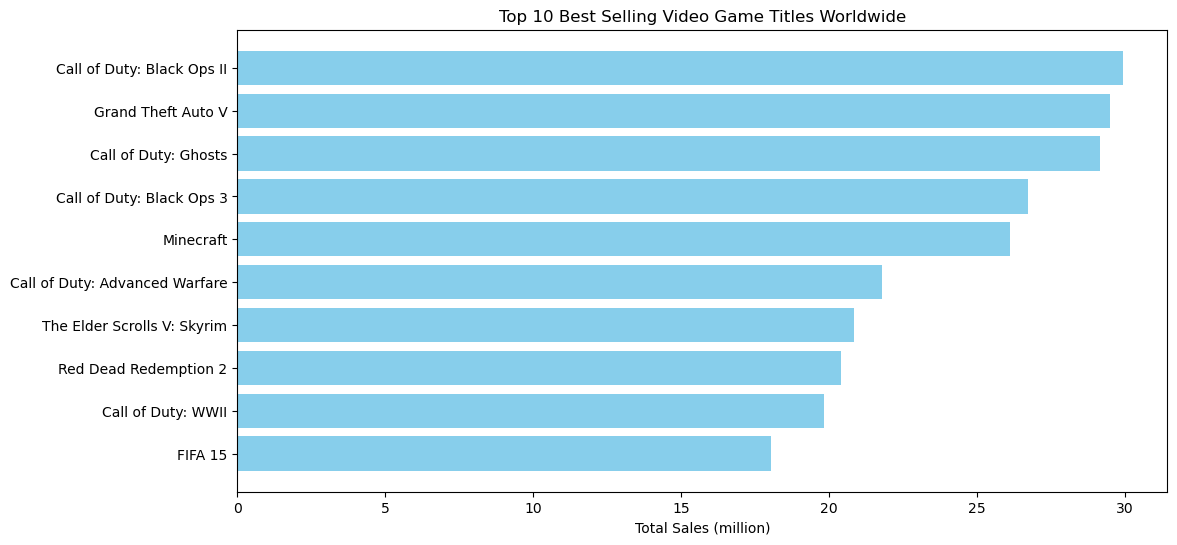

In [165]:
plt.figure(figsize=(12, 6))
plt.barh(Top_titles['title'], Top_titles['total_sales'], color='skyblue')
plt.xlabel('Total Sales (million)')
plt.title('Top 10 Best Selling Video Game Titles Worldwide')
plt.gca().invert_yaxis()  # To show highest selling title at the top
plt.show()

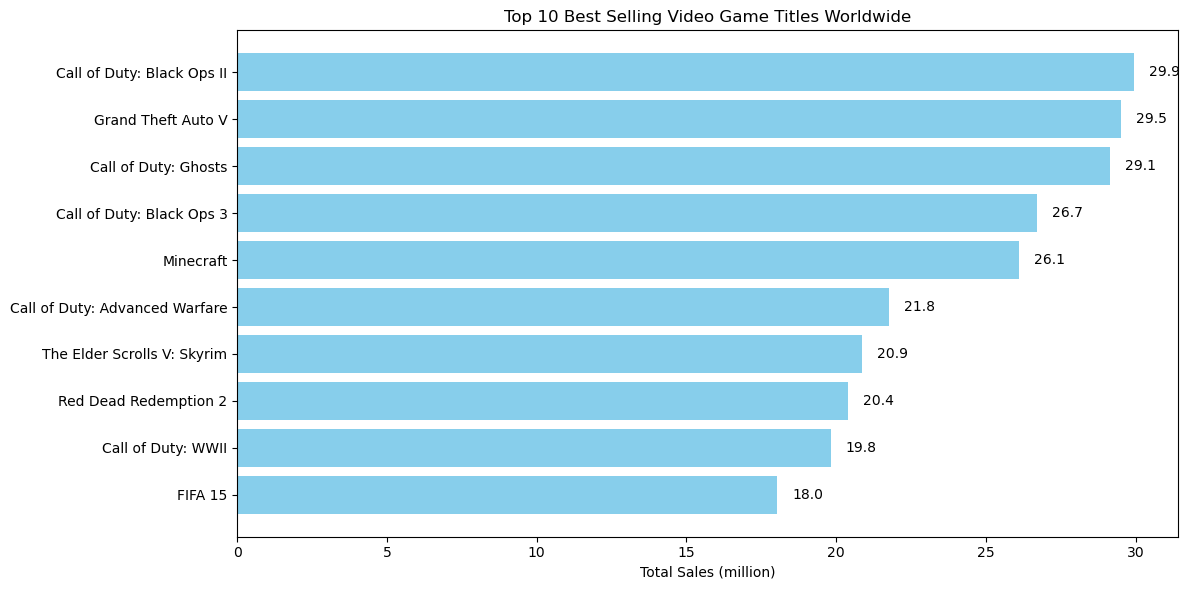

In [167]:

plt.figure(figsize=(12, 6))
bars = plt.barh(Top_titles['title'], Top_titles['total_sales'], color='skyblue')
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2, f'{width:.1f}', va='center')
plt.xlabel('Total Sales (million)')
plt.title('Top 10 Best Selling Video Game Titles Worldwide')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

### Year with highest sales, and how the industry grown over time

In [171]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year

In [173]:
df.head

<bound method NDFrame.head of                                   title console             genre  \
1                    Grand Theft Auto V     PS4            Action   
4             Call of Duty: Black Ops 3     PS4           Shooter   
7                 Red Dead Redemption 2     PS4  Action-Adventure   
8            Call of Duty: Black Ops II    X360           Shooter   
9            Call of Duty: Black Ops II     PS3           Shooter   
...                                 ...     ...               ...   
64011             XBlaze Lost: Memories      PC      Visual Novel   
64012                      Yoru, Tomosu     PS4      Visual Novel   
64013                      Yoru, Tomosu      NS      Visual Novel   
64014   Yunohana SpRING! ~Mellow Times~      NS      Visual Novel   
64015  Yurukill: The Calumniation Games     PS4      Visual Novel   

                  publisher             developer  critic_score  total_sales  \
1            Rockstar Games        Rockstar North       9.700

#### Grouping year and sales

In [178]:
Sales_by_year = df.groupby('release_year')['total_sales'].sum().reset_index()

In [180]:
Sales_by_year

,release_year,total_sales
0,1971,0.349113
1,1977,0.349113
2,1979,1.047338
3,1980,8.029591
4,1981,7.680479
5,1982,16.757408
6,1983,23.041436
7,1984,6.284028
8,1985,5.236690
9,1986,10.822493


In [182]:
Sales_by_year_sorted = Sales_by_year.sort_values(by = 'total_sales', ascending = False)

In [184]:
Sales_by_year_sorted

,release_year,total_sales
29,2006,1877.065942
37,2014,471.493745
40,2017,462.513927
41,2018,448.885124
42,2019,437.195278
43,2020,400.683123
38,2015,382.844083
39,2016,367.271252
36,2013,337.120562
35,2012,286.517042


#### Top year with the highest sales

In [191]:
Top_10_year = Sales_by_year_sorted.head(10)

In [193]:
Top_10_year

,release_year,total_sales
29,2006,1877.065942
37,2014,471.493745
40,2017,462.513927
41,2018,448.885124
42,2019,437.195278
43,2020,400.683123
38,2015,382.844083
39,2016,367.271252
36,2013,337.120562
35,2012,286.517042


AttributeError: module 'matplotlib.pyplot' has no attribute 'sticks'

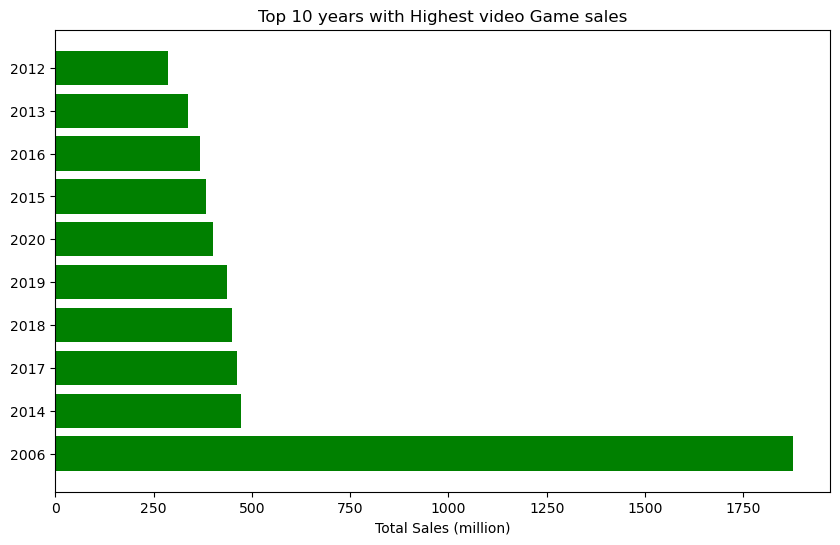

In [199]:
plt.figure(figsize=(10, 6))
plt.barh(Top_10_year['release_year'].astype(str), Top_10_year['total_sales'], color='Green')
plt.xlabel('release_year')
plt.xlabel('Total Sales (million)')
plt.title('Top 10 years with Highest video Game sales')
plt.sticks(rotation = 45)
plt.tight_layout()
plt.gca().invert_yaxis()  
plt.show()

In [195]:
df.column

Index(['title', 'console', 'genre', 'publisher', 'developer', 'critic_score',
       'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales',
       'release_date', 'last_update', 'release_year'],
      dtype='object')

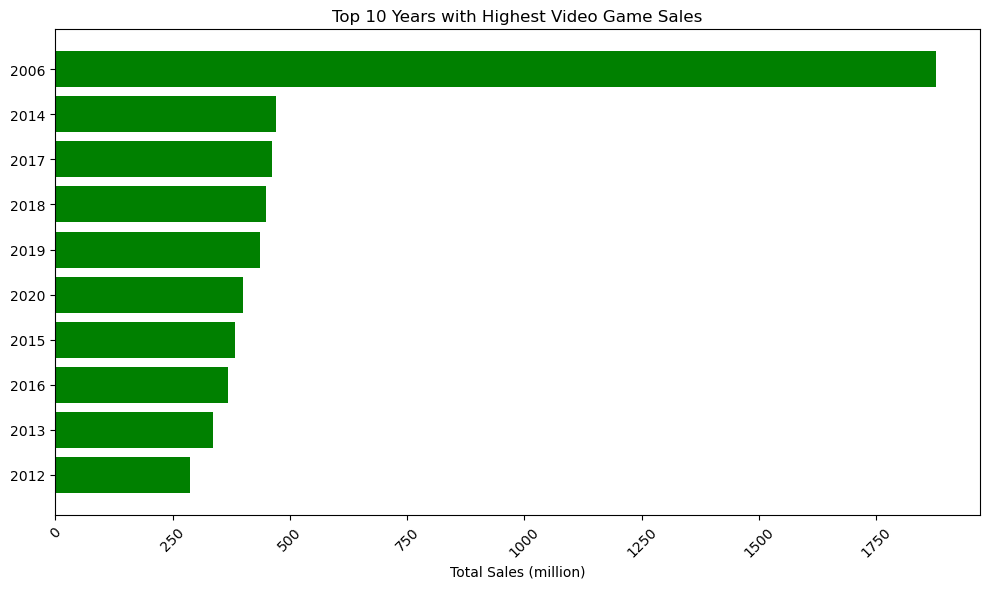

In [201]:
plt.figure(figsize=(10, 6))
plt.barh(Top_10_year['release_year'].astype(str), Top_10_year['total_sales'], color='green')
plt.xlabel('Total Sales (million)')
plt.title('Top 10 Years with Highest Video Game Sales')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.gca().invert_yaxis()  
plt.show()

In [206]:
Sales_by_year = Sales_by_year.sort_values(by = 'release_year')

In [208]:
Sales_by_year

,release_year,total_sales
0,1971,0.349113
1,1977,0.349113
2,1979,1.047338
3,1980,8.029591
4,1981,7.680479
5,1982,16.757408
6,1983,23.041436
7,1984,6.284028
8,1985,5.236690
9,1986,10.822493


#### To plot global year trend

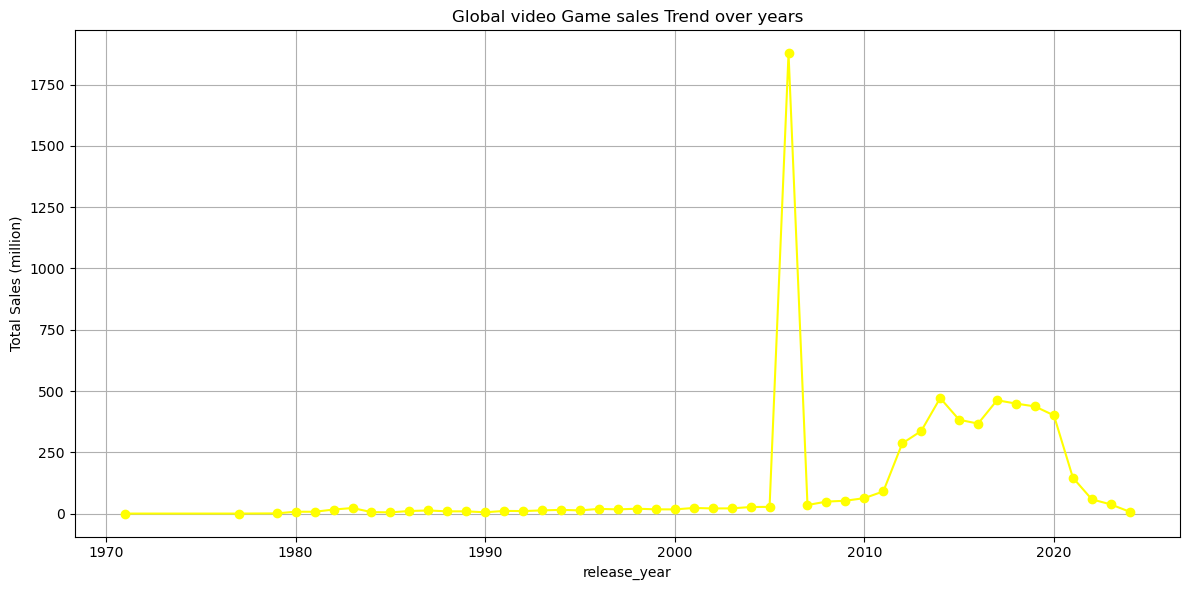

In [216]:
plt.figure(figsize=(12, 6))
plt.plot(Sales_by_year['release_year'],Sales_by_year['total_sales'], marker = 'o', color='yellow')
plt.xlabel('release_year')
plt.ylabel('Total Sales (million)')
plt.title('Global video Game sales Trend over years')
plt.grid(True) 
plt.tight_layout()
plt.show()

#### To check if any console specialize in a particukar genre

In [221]:
Console_genre_sales = df.groupby(['console', 'genre'])['total_sales'].sum()

In [223]:
Console_genre_sales

console  genre       
2600     Action           2.792901
         Role-Playing     0.349113
         Shooter          0.349113
3DO      Misc             0.698225
3DS      Action          21.531606
                           ...    
iOS      Shooter          2.094676
         Simulation       2.792901
         Sports           1.047338
         Strategy         3.840239
         Visual Novel     0.349113
Name: total_sales, Length: 555, dtype: float64

In [233]:
Console_genre_sales = df.groupby(['console', 'genre'])['total_sales'].sum().reset_index()
pivot_df = Console_genre_sales.pivot(index='console', columns='genre', values='total_sales').fillna(0)

AttributeError: module 'matplotlib.pyplot' has no attribute 'xtick'

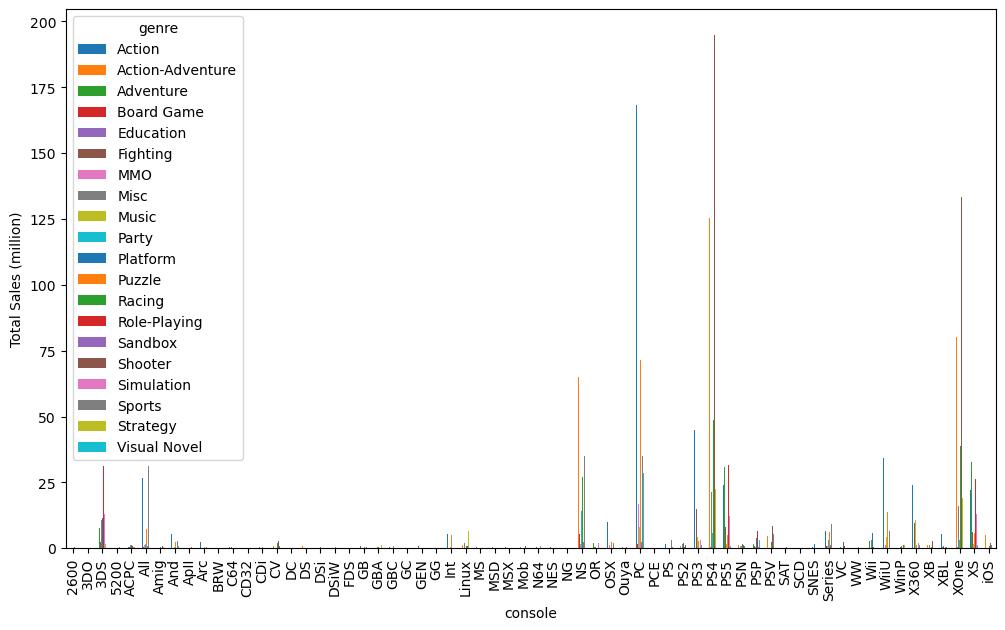

In [237]:
pivot_df.plot(kind = 'bar', figsize = (12,7))
plt.xlabel('console')
plt.ylabel('Total Sales (million)')
plt.xtick(rotation = 45)
plt.title('Video Game sales by console and Genre')
plt.legend(title = 'Genre', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

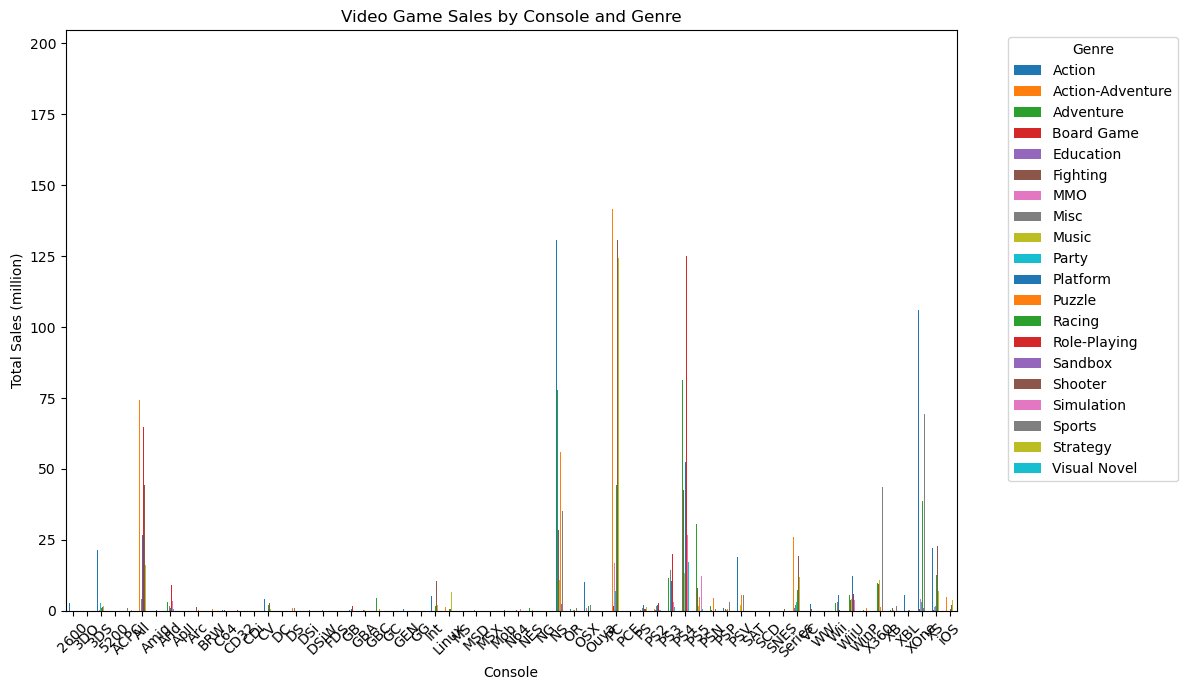

In [239]:
pivot_df.plot(kind='bar', figsize=(12, 7))
plt.xlabel('Console')
plt.ylabel('Total Sales (million)')
plt.xticks(rotation=45)  # fixed this line
plt.title('Video Game Sales by Console and Genre')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()